# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 451 kB 24.7 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 22.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 65 kB 5.5 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 45.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 50 kB 5.9 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.finalproject # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [9]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [10]:
count = 100 #number of returned tweets, default and max is 100
geocode = "39.081280,-105.529292,300mi"  # defin the location, in Harrisonburg, VA
q = "covid"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [14]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Dec 09 14:23:42 +0000 2021'
'Thu Dec 09 14:23:27 +0000 2021'


Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [16]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Mon Dec 06 13:51:11 +0000 2021'
'Mon Dec 06 13:51:05 +0000 2021'
'Mon Dec 06 13:45:43 +0000 2021'
'Mon Dec 06 13:40:04 +0000 2021'
'Mon Dec 06 13:36:53 +0000 2021'
'Mon Dec 06 13:36:51 +0000 2021'
'Mon Dec 06 13:27:04 +0000 2021'
'Mon Dec 06 13:26:50 +0000 2021'
'Mon Dec 06 13:24:22 +0000 2021'
'Mon Dec 06 13:19:01 +0000 2021'
'Mon Dec 06 13:18:04 +0000 2021'
'Mon Dec 06 13:15:52 +0000 2021'
'Mon Dec 06 13:06:57 +0000 2021'
'Mon Dec 06 13:06:36 +0000 2021'
'Mon Dec 06 13:05:02 +0000 2021'
'Mon Dec 06 12:48:29 +0000 2021'
'Mon Dec 06 12:38:39 +0000 2021'
'Mon Dec 06 12:35:57 +0000 2021'
'Mon Dec 06 12:21:24 +0000 2021'
'Mon Dec 06 12:16:58 +0000 2021'
'Mon Dec 06 12:16:04 +0000 2021'
'Mon Dec 06 12:16:04 +0000 2021'
'Mon Dec 06 12:12:43 +0000 2021'
'Mon Dec 06 12:03:05 +0000 2021'
'Mon Dec 06 11:50:10 +0000 2021'
'Mon Dec 06 11:50:02 +0000 2021'
'Mon Dec 06 11:47:30 +0000 2021'
'Mon Dec 06 11:38:58 +0000 2021'
'Mon Dec 06 11:29:31 +0000 2021'
'Mon Dec 06 11:11:22 +0000 2021'
'Mon Dec 0

'Mon Dec 06 00:14:15 +0000 2021'
'Mon Dec 06 00:12:46 +0000 2021'
'Mon Dec 06 00:12:25 +0000 2021'
'Mon Dec 06 00:11:24 +0000 2021'
'Mon Dec 06 00:11:00 +0000 2021'
'Mon Dec 06 00:09:46 +0000 2021'
'Mon Dec 06 00:07:45 +0000 2021'
'Mon Dec 06 00:06:43 +0000 2021'
'Mon Dec 06 00:06:26 +0000 2021'
'Mon Dec 06 00:03:57 +0000 2021'
'Mon Dec 06 00:00:37 +0000 2021'
'Sun Dec 05 23:58:26 +0000 2021'
'Sun Dec 05 23:56:17 +0000 2021'
'Sun Dec 05 23:53:02 +0000 2021'
'Sun Dec 05 23:51:16 +0000 2021'
'Sun Dec 05 23:50:48 +0000 2021'
'Sun Dec 05 23:49:06 +0000 2021'
'Sun Dec 05 23:45:02 +0000 2021'
'Sun Dec 05 23:34:51 +0000 2021'
'Sun Dec 05 23:34:02 +0000 2021'
'Sun Dec 05 23:33:57 +0000 2021'
'Sun Dec 05 23:33:53 +0000 2021'
'Sun Dec 05 23:33:33 +0000 2021'
'Sun Dec 05 23:31:51 +0000 2021'
'Sun Dec 05 23:31:27 +0000 2021'
'Sun Dec 05 23:31:11 +0000 2021'
'Sun Dec 05 23:27:43 +0000 2021'
'Sun Dec 05 23:24:01 +0000 2021'
'Sun Dec 05 23:23:44 +0000 2021'
'Sun Dec 05 23:23:33 +0000 2021'
'Sun Dec 0

'Sun Dec 05 17:02:06 +0000 2021'
'Sun Dec 05 16:59:53 +0000 2021'
'Sun Dec 05 16:59:14 +0000 2021'
'Sun Dec 05 16:57:35 +0000 2021'
'Sun Dec 05 16:52:07 +0000 2021'
'Sun Dec 05 16:51:03 +0000 2021'
'Sun Dec 05 16:48:37 +0000 2021'
'Sun Dec 05 16:46:33 +0000 2021'
'Sun Dec 05 16:45:08 +0000 2021'
'Sun Dec 05 16:41:38 +0000 2021'
'Sun Dec 05 16:40:26 +0000 2021'
'Sun Dec 05 16:40:22 +0000 2021'
'Sun Dec 05 16:40:01 +0000 2021'
'Sun Dec 05 16:35:09 +0000 2021'
'Sun Dec 05 16:35:07 +0000 2021'
'Sun Dec 05 16:33:58 +0000 2021'
'Sun Dec 05 16:33:32 +0000 2021'
'Sun Dec 05 16:33:29 +0000 2021'
'Sun Dec 05 16:30:23 +0000 2021'
'Sun Dec 05 16:30:04 +0000 2021'
'Sun Dec 05 16:29:24 +0000 2021'
'Sun Dec 05 16:27:22 +0000 2021'
'Sun Dec 05 16:26:00 +0000 2021'
'Sun Dec 05 16:25:15 +0000 2021'
'Sun Dec 05 16:24:02 +0000 2021'
'Sun Dec 05 16:18:51 +0000 2021'
'Sun Dec 05 16:17:29 +0000 2021'
'Sun Dec 05 16:15:54 +0000 2021'
'Sun Dec 05 16:13:55 +0000 2021'
'Sun Dec 05 16:11:57 +0000 2021'
'Sun Dec 0

'Sun Dec 05 03:00:21 +0000 2021'
'Sun Dec 05 02:55:58 +0000 2021'
'Sun Dec 05 02:54:39 +0000 2021'
'Sun Dec 05 02:50:51 +0000 2021'
'Sun Dec 05 02:50:09 +0000 2021'
'Sun Dec 05 02:48:07 +0000 2021'
'Sun Dec 05 02:46:13 +0000 2021'
'Sun Dec 05 02:43:41 +0000 2021'
'Sun Dec 05 02:43:20 +0000 2021'
'Sun Dec 05 02:42:33 +0000 2021'
'Sun Dec 05 02:40:04 +0000 2021'
'Sun Dec 05 02:31:49 +0000 2021'
'Sun Dec 05 02:30:31 +0000 2021'
'Sun Dec 05 02:25:28 +0000 2021'
'Sun Dec 05 02:20:28 +0000 2021'
'Sun Dec 05 02:19:21 +0000 2021'
'Sun Dec 05 02:18:13 +0000 2021'
'Sun Dec 05 02:13:10 +0000 2021'
'Sun Dec 05 02:13:01 +0000 2021'
'Sun Dec 05 02:13:00 +0000 2021'
'Sun Dec 05 02:10:43 +0000 2021'
'Sun Dec 05 02:00:40 +0000 2021'
'Sun Dec 05 01:50:37 +0000 2021'
'Sun Dec 05 01:49:36 +0000 2021'
'Sun Dec 05 01:49:20 +0000 2021'
'Sun Dec 05 01:41:40 +0000 2021'
'Sun Dec 05 01:41:19 +0000 2021'
'Sun Dec 05 01:39:16 +0000 2021'
'Sun Dec 05 01:38:22 +0000 2021'
'Sun Dec 05 01:37:46 +0000 2021'
'Sun Dec 0

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [17]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

3759
1999


Create a text index and print the Tweets containing specific keywords. 

In [18]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid"}}) # return tweets contain vote

Use pprint to display tweets

In [20]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: TF 2
text: @danaparish Long COVID is CNS COVID - don’t share air or swap fluids with a COVID + carrier. It’s not worth Virus in your Brainstem.
----
name: Public Health
text: Do you have symptoms of COVID-19?     
   
Get a FREE COVID-19 test today. There are 4 free community-based COVID-1… https://t.co/69NhXsyM9j
----
name: Steve Kear
text: @BilldeBlasio Vaccines for covid don’t prevent covid and don’t keep one from spreading covid.  So to mandate a vacc… https://t.co/9t1EohrqH3
----
name: Prof. Jose-Luis Jimenez
text: Resumen (tasas por millón de niños con COVID): 

a) Mortalidad COVID: 74 
b) COVID largo: 110000
c) Efectos secunda… https://t.co/dqfMT9Yo8y
----
name: Paolo Zialcita
text: @clairevtran covid doing college tours, covid trying out for varsity
----
name: Rex ShadesEagle
text: @RoxyWright0 There havent been that many Covid deaths, there have been that many people who died with, not from covid
----
name: Themperor Kennedy🐸🏳️‍🌈
text: If dying from COVID is really 

In [21]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid"}}) # return tweets contain vote

Use pandas to display tweets

In [22]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,61b21191dfd7ae5cc738e766,Wed Dec 08 20:38:46 +0000 2021,1468681483002986496,1468681483002986496,@danaparish Long COVID is CNS COVID - don’t sh...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.468649e+18,...,0,1,False,False,en,NaN,NaN,NaN,NaN,NaN
1,61b211b8dfd7ae5cc738eec0,Mon Dec 06 21:00:15 +0000 2021,1467962110185512966,1467962110185512966,Do you have symptoms of COVID-19? \n \nG...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://www.hootsuite.com"" rel=""nofol...",NaN,...,3,5,False,False,en,False,NaN,NaN,NaN,NaN
2,61b211a2dfd7ae5cc738eacd,Tue Dec 07 21:35:46 +0000 2021,1468333438331621376,1468333438331621376,@BilldeBlasio Vaccines for covid don’t prevent...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.468302e+18,...,1,5,False,False,en,NaN,NaN,NaN,NaN,NaN
3,61b211a0dfd7ae5cc738ea62,Tue Dec 07 23:40:23 +0000 2021,1468364800031920133,1468364800031920133,Resumen (tasas por millón de niños con COVID):...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.468364e+18,...,30,108,False,False,es,NaN,NaN,NaN,NaN,NaN
4,61b211b0dfd7ae5cc738ed7b,Tue Dec 07 02:42:36 +0000 2021,1468048268391182340,1468048268391182340,"@clairevtran covid doing college tours, covid ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.468048e+18,...,0,2,False,False,en,NaN,NaN,NaN,NaN,NaN
5,61b211a5dfd7ae5cc738eb5c,Tue Dec 07 19:02:16 +0000 2021,1468294808749756416,1468294808749756416,@RoxyWright0 There havent been that many Covid...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.468291e+18,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
6,61b211b1dfd7ae5cc738ed93,Tue Dec 07 02:10:58 +0000 2021,1468040305622536195,1468040305622536195,If dying from COVID is really so bad how come ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,2,12,False,False,en,NaN,NaN,NaN,NaN,NaN
7,61b211afdfd7ae5cc738ed2e,Tue Dec 07 05:08:08 +0000 2021,1468084891560525825,1468084891560525825,@B52Malmet Before Covid. We enjoyed SoupPlanta...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.468015e+18,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
8,61b211a6dfd7ae5cc738eb7a,Tue Dec 07 18:33:50 +0000 2021,1468287651853840395,1468287651853840395,@Peanut_SSBU Covid doesnt live super long on s...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.468277e+18,...,0,18,False,False,en,NaN,NaN,NaN,NaN,NaN
9,61b211a1dfd7ae5cc738ea96,Tue Dec 07 22:44:46 +0000 2021,1468350802313953281,1468350802313953281,@AustinOnSocial Better than COVID. I’m recover...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.468320e+18,...,0,2,False,False,en,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

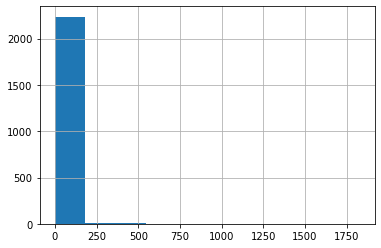

In [23]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count